                                            Employee Promotion Prediction

In [1]:
# Connect to the working directory
import os
os.getcwd()
os.chdir('C:/Users/Abin/Desktop/Competition\WNS_Analytics')
# import the required package and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the train data
train=pd.read_csv('train.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train.shape

(54808, 14)

In [4]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [2]:
# Read the test data
test=pd.read_csv('test.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
test.shape

(23490, 13)

                                            1. Data Cleaning and EDA

In [18]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [20]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [21]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [22]:
train.education.fillna("Bachelor's",inplace=True)
test.education.fillna("Bachelor's",inplace=True)

In [23]:
train.previous_year_rating.fillna(3.0,inplace=True)
test.previous_year_rating.fillna(3.0,inplace=True)

In [24]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [25]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

                                             Combine train and test set

In [26]:
train["Source"] = "Train"
test["Source"] = "Test"

In [27]:
fulldata = pd.concat([train,test])
fulldata.shape

C:\Users\Abin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(78298, 15)

In [28]:
fulldata.head()

,KPIs_met >80%,Source,age,avg_training_score,awards_won?,department,education,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region
0,1,Train,35,49,0,Sales & Marketing,Master's & above,65438,f,0.0,8,1,5.0,sourcing,region_7
1,0,Train,30,60,0,Operations,Bachelor's,65141,m,0.0,4,1,5.0,other,region_22
2,0,Train,34,50,0,Sales & Marketing,Bachelor's,7513,m,0.0,7,1,3.0,sourcing,region_19
3,0,Train,39,50,0,Sales & Marketing,Bachelor's,2542,m,0.0,10,2,1.0,other,region_23
4,0,Train,45,73,0,Technology,Bachelor's,48945,m,0.0,2,1,3.0,other,region_26


In [29]:
fulldata.tail()

,KPIs_met >80%,Source,age,avg_training_score,awards_won?,department,education,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region
23485,0,Test,24,61,0,Legal,Below Secondary,53478,m,NaN,1,1,3.0,sourcing,region_2
23486,0,Test,31,74,0,Technology,Bachelor's,25600,m,NaN,7,1,3.0,sourcing,region_25
23487,0,Test,26,50,0,HR,Bachelor's,45409,f,NaN,4,1,4.0,sourcing,region_16
23488,0,Test,27,70,0,Procurement,Bachelor's,1186,m,NaN,1,3,3.0,sourcing,region_31
23489,1,Test,40,89,0,Technology,Master's & above,5973,m,NaN,5,3,5.0,other,region_17


In [30]:
fulldata.dtypes

KPIs_met >80%             int64
Source                   object
age                       int64
avg_training_score        int64
awards_won?               int64
department               object
education                object
employee_id               int64
gender                   object
is_promoted             float64
length_of_service         int64
no_of_trainings           int64
previous_year_rating    float64
recruitment_channel      object
region                   object
dtype: object

In [31]:
fulldata.isnull().sum()

KPIs_met >80%               0
Source                      0
age                         0
avg_training_score          0
awards_won?                 0
department                  0
education                   0
employee_id                 0
gender                      0
is_promoted             23490
length_of_service           0
no_of_trainings             0
previous_year_rating        0
recruitment_channel         0
region                      0
dtype: int64

In [32]:
fulldata['length_of_service'].value_counts()

3     10066
4      9747
2      9554
5      8424
7      7895
6      6772
1      6539
8      4146
9      3699
10     3134
11     1268
12     1122
13      958
15      833
14      810
16      760
17      636
18      558
19      471
20      190
21      107
23       96
22       88
24       88
25       75
26       55
27       52
28       42
29       40
31       27
30       18
32       11
33       10
34        6
37        1
Name: length_of_service, dtype: int64

In [33]:
fulldata.columns

Index(['KPIs_met >80%', 'Source', 'age', 'avg_training_score', 'awards_won?',
       'department', 'education', 'employee_id', 'gender', 'is_promoted',
       'length_of_service', 'no_of_trainings', 'previous_year_rating',
       'recruitment_channel', 'region'],
      dtype='object')

In [34]:
fulldata['awards_won?'].value_counts()

0    76493
1     1805
Name: awards_won?, dtype: int64

In [35]:
fulldata['department'].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [36]:
fulldata['education'].value_counts()

Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [37]:
fulldata['gender'].value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [38]:
fulldata['no_of_trainings'].value_counts()

1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
9         7
8         7
10        5
Name: no_of_trainings, dtype: int64

In [39]:
# combine the levels which has less observations
fulldata.loc[fulldata['no_of_trainings']>=5,'no_of_trainings']='5_10'
fulldata['no_of_trainings'].value_counts()

1       63306
2       11531
3        2531
4         658
5_10      272
Name: no_of_trainings, dtype: int64

In [40]:
fulldata['previous_year_rating'].value_counts()

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [41]:
fulldata['recruitment_channel'].value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [42]:
fulldata['region'].value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

In [43]:
pd.crosstab(index=fulldata['region'],columns=fulldata['is_promoted'])                                

is_promoted,0.0,1.0
region,,
region_1,552,58
region_10,597,51
region_11,1241,74
region_12,467,33
region_13,2418,230
region_14,765,62
region_15,2586,222
region_16,1363,102
region_17,687,109


In [44]:
map_dict={"region":{'region_1':0,'region_2':0,'region_3':0,'region_4':0,'region_5':0,'region_6':1,'region_7':1,'region_8':1,'region_9':1,'region_10':1,'region_11':2,
                       'region_12':2,'region_13':2,'region_14':2,'region_15':2,'region_16':3,'region_17':3,'region_18':3,'region_19':3,'region_20':3,
                       'region_21':4,'region_22':4,'region_23':4,'region_24':4,'region_25':4,'region_26':5,'region_27':5,'region_28':5,'region_29':5,'region_30':5,
                        'region_31':6,'region_32':6,'region_33':6,'region_34':6}}

In [45]:
fulldata=fulldata.replace(map_dict)
fulldata['region'].head()

0    1
1    4
2    3
3    4
4    5
Name: region, dtype: int64

In [46]:
fulldata['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [47]:
fulldata['avg_training_score'].value_counts()

50    3943
49    3825
48    3521
51    3370
60    3044
59    2941
58    2687
52    2647
61    2647
47    2533
62    2082
57    2070
82    1974
81    1924
53    1875
80    1769
83    1749
84    1715
46    1642
79    1626
70    1542
85    1505
69    1466
56    1464
63    1448
54    1421
78    1331
86    1307
71    1296
68    1291
      ... 
64    1048
67    1041
72    1023
77    1000
45     998
87     948
65     838
66     806
73     762
76     741
88     617
74     603
75     573
44     496
89     433
90     267
43     244
91     162
92     135
93     110
94      96
42      78
96      75
97      71
95      68
98      51
99      48
41      37
40       8
39       3
Name: avg_training_score, Length: 61, dtype: int64

In [48]:
np.percentile(train.loc[:,'age'], [92,93,95,96,97,98,99,100]) 

array([47., 48., 51., 52., 54., 56., 58., 60.])

In [49]:
np.percentile(train.loc[:,'age'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

array([20., 20., 21., 22., 22., 22., 22., 22.])

In [50]:
np.percentile(train.loc[:,'length_of_service'], [92,93,95,96,97,98,99,100]) 

array([12., 13., 15., 16., 17., 18., 20., 37.])

In [51]:
np.percentile(train.loc[:,'length_of_service'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
fulldata.loc[fulldata['length_of_service']>30,'length_of_service']=30
fulldata['length_of_service'].value_counts()

3     10066
4      9747
2      9554
5      8424
7      7895
6      6772
1      6539
8      4146
9      3699
10     3134
11     1268
12     1122
13      958
15      833
14      810
16      760
17      636
18      558
19      471
20      190
21      107
23       96
22       88
24       88
25       75
30       73
26       55
27       52
28       42
29       40
Name: length_of_service, dtype: int64

In [53]:
np.percentile(train.loc[:,'avg_training_score'], [92,93,95,96,97,98,99,100]) 

array([84., 85., 86., 86., 87., 88., 91., 99.])

In [54]:
np.percentile(train.loc[:,'avg_training_score'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

array([42., 43., 43., 43., 44., 44., 44., 44.])

In [55]:
fulldata.columns

Index(['KPIs_met >80%', 'Source', 'age', 'avg_training_score', 'awards_won?',
       'department', 'education', 'employee_id', 'gender', 'is_promoted',
       'length_of_service', 'no_of_trainings', 'previous_year_rating',
       'recruitment_channel', 'region'],
      dtype='object')

In [56]:
full_set=fulldata.copy()

In [57]:
full_set['awards_won?']=full_set['awards_won?'].astype(object)
full_set['is_promoted']=full_set['is_promoted'].astype(object)
full_set['previous_year_rating']=full_set['previous_year_rating'].astype(object)
full_set['KPIs_met >80%']=full_set['KPIs_met >80%'].astype(object)
full_set['region']=full_set['region'].astype(object)

In [58]:
object_val=[x for x in full_set.dtypes.index if full_set.dtypes[x]=='object']
object_val

['KPIs_met >80%',
 'Source',
 'awards_won?',
 'department',
 'education',
 'gender',
 'is_promoted',
 'no_of_trainings',
 'previous_year_rating',
 'recruitment_channel',
 'region']

In [59]:
int_val=[x for x in full_set.dtypes.index if full_set.dtypes[x]!='object']
int_val

['age', 'avg_training_score', 'employee_id', 'length_of_service']

In [60]:
df_dummy = pd.DataFrame(data=full_set, columns=object_val)
df_dummy.drop('Source',axis=1,inplace=True)
df_dummy.columns

Index(['KPIs_met >80%', 'awards_won?', 'department', 'education', 'gender',
       'is_promoted', 'no_of_trainings', 'previous_year_rating',
       'recruitment_channel', 'region'],
      dtype='object')

In [61]:
dummy_coded=pd.get_dummies(df_dummy,drop_first=True,dtype=float) # with K-1
dummy_fullset=pd.concat([full_set,dummy_coded],axis=1)
to_rem=object_val.copy()
to_rem.remove('Source')
dummy_fullset.drop(to_rem,axis=1,inplace=True)
dummy_fullset.columns

Index(['Source', 'age', 'avg_training_score', 'employee_id',
       'length_of_service', 'KPIs_met >80%_1', 'awards_won?_1',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Master's & above', 'gender_m',
       'is_promoted_1.0', 'no_of_trainings_2', 'no_of_trainings_3',
       'no_of_trainings_4', 'no_of_trainings_5_10', 'previous_year_rating_2.0',
       'previous_year_rating_3.0', 'previous_year_rating_4.0',
       'previous_year_rating_5.0', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'region_1', 'region_2', 'region_3',
       'region_4', 'region_5', 'region_6'],
      dtype='object')

In [62]:
dummy_fullset.head()

,Source,age,avg_training_score,employee_id,length_of_service,KPIs_met >80%_1,awards_won?_1,department_Finance,department_HR,department_Legal,...,previous_year_rating_4.0,previous_year_rating_5.0,recruitment_channel_referred,recruitment_channel_sourcing,region_1,region_2,region_3,region_4,region_5,region_6
0,Train,35,49,65438,8,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Train,30,60,65141,4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Train,34,50,7513,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Train,39,50,2542,10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Train,45,73,48945,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
dummy_fullset['Age_Awards_Won']=dummy_fullset['age'] * dummy_fullset['awards_won?_1']
dummy_fullset['Age_Awards_Won'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Age_Awards_Won, dtype: float64

In [64]:
dummy_fullset['Age_Awards_Won'].value_counts()

0.0     76493
31.0      140
30.0      119
28.0      117
32.0      114
33.0      113
35.0      109
27.0      108
29.0      107
34.0       93
37.0       78
36.0       77
38.0       75
41.0       58
26.0       56
40.0       51
39.0       46
25.0       42
42.0       29
24.0       28
43.0       24
45.0       22
46.0       20
47.0       18
50.0       15
48.0       15
44.0       14
49.0       14
51.0       14
53.0       12
52.0       10
23.0        9
56.0        9
55.0        7
22.0        7
57.0        7
59.0        6
54.0        6
60.0        6
58.0        4
20.0        3
21.0        3
Name: Age_Awards_Won, dtype: int64

In [65]:
train_df=dummy_fullset.loc[dummy_fullset['Source']=='Train',:]
del train_df['Source']
test_df=dummy_fullset.loc[dummy_fullset['Source']=='Test',:]
del test_df['Source']

In [66]:
train_df.head()

,age,avg_training_score,employee_id,length_of_service,KPIs_met >80%_1,awards_won?_1,department_Finance,department_HR,department_Legal,department_Operations,...,previous_year_rating_5.0,recruitment_channel_referred,recruitment_channel_sourcing,region_1,region_2,region_3,region_4,region_5,region_6,Age_Awards_Won
0,35,49,65438,8,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,60,65141,4,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,34,50,7513,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,39,50,2542,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,45,73,48945,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
train_df.columns

Index(['age', 'avg_training_score', 'employee_id', 'length_of_service',
       'KPIs_met >80%_1', 'awards_won?_1', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Master's & above', 'gender_m',
       'is_promoted_1.0', 'no_of_trainings_2', 'no_of_trainings_3',
       'no_of_trainings_4', 'no_of_trainings_5_10', 'previous_year_rating_2.0',
       'previous_year_rating_3.0', 'previous_year_rating_4.0',
       'previous_year_rating_5.0', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'region_1', 'region_2', 'region_3',
       'region_4', 'region_5', 'region_6', 'Age_Awards_Won'],
      dtype='object')

In [69]:
train_x=train_df.drop(['employee_id','region_1','region_2','region_3','region_4','region_5','region_6','is_promoted_1.0'],axis=1).copy()
test_x=test_df.drop(['employee_id','region_1','region_2','region_3','region_4','region_5','region_6','is_promoted_1.0'],axis=1).copy()

In [70]:
train_x.head()

,age,avg_training_score,length_of_service,KPIs_met >80%_1,awards_won?_1,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,recruitment_channel_referred,recruitment_channel_sourcing,Age_Awards_Won
0,35,49,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,30,60,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,34,50,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,39,50,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,73,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
test_x.shape

(23490, 27)

In [72]:
train_y=train_df['is_promoted_1.0']
test_y=test_df['is_promoted_1.0']

In [73]:
train_y.tail()

54803    0.0
54804    0.0
54805    0.0
54806    0.0
54807    0.0
Name: is_promoted_1.0, dtype: float64

In [74]:
test_y.tail()

23485    0.0
23486    0.0
23487    0.0
23488    0.0
23489    0.0
Name: is_promoted_1.0, dtype: float64

                                    Cost Sensitive Learning to tackle Imbalanced Class

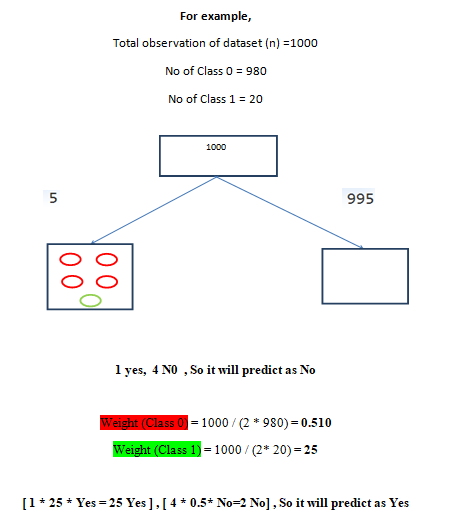

In [75]:
from IPython.display import Image
Image(filename='CSL.PNG')

                                                  Model Building

In [ ]:
a. Random Forest (To identify the significant variables)
b. Adaptive Boosting

                                                 a. Random Forest

In [76]:
# Random Forest Classifier and some other modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

                                    GridSearchCV - To choose the optimal parameter

In [77]:
# Choosing the optimal parameter for the classifier                     

param_grid = [{'max_depth':[2,3,4,6,8,10,12,14,16]}]

scorer={'recall_score': make_scorer(recall_score)}

RF = RandomForestClassifier(random_state = 123,n_estimators=300,criterion='entropy',class_weight={0:0.54,1:5.87},max_features='sqrt')
RF_GS=GridSearchCV(RF,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
RF_GS.fit(train_x,train_y)  
RF_GS.best_params_

{'max_depth': 8}

In [78]:
RF_GS.best_score_

0.8845330101173003

                                          Build the model with optimal parameter

In [79]:
RF_1 = RandomForestClassifier(random_state = 123,n_estimators=300,criterion='entropy',class_weight={0:0.54,1:5.87},max_depth=8,max_features='sqrt')
RF_1.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.54, 1: 5.87},
            criterion='entropy', max_depth=8, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

In [80]:
# predict on train set
pred_RF=RF_1.predict(train_x)
metrics.recall_score(train_y,pred_RF) 

0.9044558697514996

In [81]:
metrics.f1_score(train_y,pred_RF) 

0.3294962344402388

In [82]:
Confusion_Mat_test_RF = confusion_matrix(train_y,pred_RF)
Confusion_Mat_test_RF

array([[33403, 16737],
       [  446,  4222]], dtype=int64)

In [83]:
Var_Importance_RF= pd.Series(data=RF_1.feature_importances_,index=train_x.columns,name='variables')
Var_Importance_RF

age                             0.015498
avg_training_score              0.314348
length_of_service               0.013621
KPIs_met >80%_1                 0.328699
awards_won?_1                   0.048079
department_Finance              0.002365
department_HR                   0.004426
department_Legal                0.001617
department_Operations           0.011005
department_Procurement          0.003773
department_R&D                  0.002048
department_Sales & Marketing    0.034679
department_Technology           0.007939
education_Below Secondary       0.000865
education_Master's & above      0.004149
gender_m                        0.003455
no_of_trainings_2               0.002946
no_of_trainings_3               0.001703
no_of_trainings_4               0.000828
no_of_trainings_5_10            0.000635
previous_year_rating_2.0        0.008431
previous_year_rating_3.0        0.009513
previous_year_rating_4.0        0.009430
previous_year_rating_5.0        0.104891
recruitment_chan

In [84]:
# subset x and y with important predictors
least_importance=Var_Importance_RF[Var_Importance_RF.values < 0.005].index
train_x_1=train_x.drop(least_importance,axis=1).copy()
test_x_1=test_x.drop(least_importance,axis=1).copy()

In [85]:
least_importance

Index(['department_Finance', 'department_HR', 'department_Legal',
       'department_Procurement', 'department_R&D', 'education_Below Secondary',
       'education_Master's & above', 'gender_m', 'no_of_trainings_2',
       'no_of_trainings_3', 'no_of_trainings_4', 'no_of_trainings_5_10',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

                                          Random Forest Model-2 with important predictors

In [86]:
RF_2 = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight={0:0.54,1:5.87},max_depth=8,max_features='sqrt')
RF_2=RF_2.fit(train_x_1,train_y)

In [87]:
# predict on test set
pred_train_RF_2=RF_2.predict(train_x_1)
metrics.recall_score(train_y,pred_train_RF_2)

0.9050985432733505

In [88]:
Var_Importance_RF_2= pd.Series(data=RF_2.feature_importances_,index=train_x_1.columns,name='variables')
Var_Importance_RF_2

age                             0.019823
avg_training_score              0.344908
length_of_service               0.017319
KPIs_met >80%_1                 0.322039
awards_won?_1                   0.033904
department_Operations           0.011828
department_Sales & Marketing    0.051481
department_Technology           0.009704
previous_year_rating_2.0        0.006044
previous_year_rating_3.0        0.011193
previous_year_rating_4.0        0.009875
previous_year_rating_5.0        0.104642
Age_Awards_Won                  0.057240
Name: variables, dtype: float64

In [89]:
# subset-2 with important predictors
least_importance_2=Var_Importance_RF_2[Var_Importance_RF_2.values < 0.008].index
train_x_2=train_x_1.drop(least_importance_2,axis=1).copy()
test_x_2=test_x_1.drop(least_importance_2,axis=1).copy()

In [90]:
least_importance_2

Index(['previous_year_rating_2.0'], dtype='object')

                                          Random Forest Model-3 with important predictors

In [91]:
RF_3 = RandomForestClassifier(random_state = 123,n_estimators=400,criterion='entropy',class_weight={0:0.54,1:2.5},max_depth=8,max_features='sqrt')
RF_3=RF_3.fit(train_x_2,train_y)

In [92]:
# predict on test set
pred_train_RF_3=RF_3.predict(train_x_2)
metrics.recall_score(train_y,pred_train_RF_3)

0.4310197086546701

In [93]:
Var_Importance_RF_3= pd.Series(data=RF_3.feature_importances_,index=train_x_2.columns,name='variables')
Var_Importance_RF_3

age                             0.018710
avg_training_score              0.365648
length_of_service               0.017748
KPIs_met >80%_1                 0.296967
awards_won?_1                   0.048312
department_Operations           0.017945
department_Sales & Marketing    0.057065
department_Technology           0.010041
previous_year_rating_3.0        0.010048
previous_year_rating_4.0        0.008966
previous_year_rating_5.0        0.094888
Age_Awards_Won                  0.053661
Name: variables, dtype: float64

In [94]:
metrics.f1_score(train_y,pred_train_RF_3)

0.4697641839831893

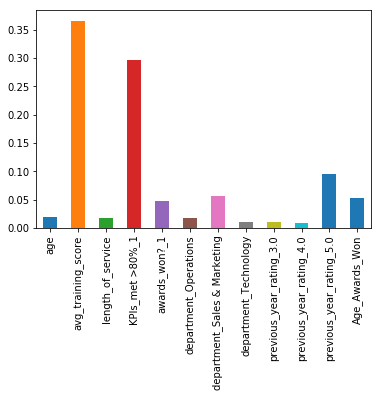

In [95]:
%matplotlib inline
Var_Importance_RF_3.plot(kind='bar')

In [96]:
from sklearn.cross_validation import cross_val_score

C:\Users\Abin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [97]:
cross_val=cross_val_score(RF_3,train_x_2,train_y,cv=5,scoring='f1',n_jobs=-1)

In [98]:
cross_val

array([0.45661037, 0.42738095, 0.42420382, 0.44784915, 0.44821092])

In [96]:
# predict the test set
test_P=RF_3.predict(test_x_2)

In [97]:
test_P.shape

(23490,)

In [98]:
test_x_2.columns

Index(['age', 'avg_training_score', 'length_of_service', 'KPIs_met >80%_1',
       'awards_won?_1', 'department_Operations',
       'department_Sales & Marketing', 'department_Technology',
       'previous_year_rating_4.0', 'previous_year_rating_5.0'],
      dtype='object')

In [99]:
output=pd.DataFrame({'employee_id':test['employee_id'],'is_promoted':test_P})
output.head()

,employee_id,is_promoted
0,8724,1.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [100]:
output.to_csv("RandomForest_solution.csv", index = False)

In [101]:
output.tail()

,employee_id,is_promoted
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0
23489,5973,1.0


                                    b. Adaptive Boosting with Decision Tree as base estimator

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [234]:
from sklearn.ensemble import AdaBoostClassifier
estimator=DecisionTreeClassifier(max_depth=3,random_state=100,class_weight={0:1,1:4})
AB= AdaBoostClassifier(base_estimator=estimator,random_state=100)

                                    Choosing the Optimal Parameter using Grid Search

In [235]:
paramgrid={'n_estimators':[50,100,150,200],'learning_rate':[0.2,0.4,0.6,0.8,1]}
scorer={'f1_score': make_scorer(f1_score)}
AdaGS=GridSearchCV(AB,param_grid=paramgrid,scoring=scorer,refit='f1_score',cv=3,n_jobs=-1)
AdaBo_Model=AdaGS.fit(train_x_2,train_y)
AdaBo_Model.best_score_

0.46048244979557446

In [236]:
AdaBo_Model.best_params_

{'learning_rate': 0.2, 'n_estimators': 50}

                                       Build the model with the optimal parameter

In [237]:
AB_1= AdaBoostClassifier(base_estimator=estimator,n_estimators=50,learning_rate=0.2,random_state=100)
m1=AB_1.fit(train_x_2,train_y)

In [238]:
# predict on train set
train_P=m1.predict(train_x_2)
metrics.recall_score(train_y,train_P) 

0.44751499571550984

In [239]:
metrics.f1_score(train_y,train_P) 

0.47792267215740103

In [240]:
cross_val=cross_val_score(m1,train_x_2,train_y,cv=3,scoring='f1',n_jobs=-1)

In [241]:
cross_val

array([0.45685279, 0.45790554, 0.46668921])

In [242]:
# predict the test set
test_P=m1.predict(test_x_2)

In [243]:
output=pd.DataFrame({'employee_id':test['employee_id'],'is_promoted':test_P})
output.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [244]:
output.to_csv("AdaBoost_solution8.csv", index = False)

In [204]:
output.tail()

,employee_id,is_promoted
23485,53478,0.0
23486,25600,0.0
23487,45409,0.0
23488,1186,0.0
23489,5973,1.0


In [379]:
from sklearn.ensemble import GradientBoostingClassifier

In [380]:
GBM=GradientBoostingClassifier(max_depth=20,random_state=100,max_features='sqrt')

In [154]:
paramgrid={'n_estimators':[50,75,100,200,300,400],'learning_rate':[0.1,0.3,0.5,0.6,0.7,0.8,1]}
scorer={'recall_score': make_scorer(recall_score)}
GBMCV=GridSearchCV(GBM,param_grid=paramgrid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
GBM_Model=GBMCV.fit(train_x_2,train_y)
GBM_Model.best_score_

0.4280225120532945

In [155]:
GBM_Model.best_params_

{'learning_rate': 0.6, 'n_estimators': 400}

                                       Build the model with the optimal parameter

In [450]:
GBM_model=GradientBoostingClassifier(max_depth=2,random_state=100,max_features='sqrt',learning_rate=0.6,n_estimators=800)
GBM_model=GBM_model.fit(train_x_2,train_y)

In [451]:
# predict on train set
train_P=GBM_model.predict(train_x_2)
metrics.recall_score(train_y,train_P) 

0.29927163667523565

In [452]:
metrics.f1_score(train_y,train_P) 

0.4469684850423932

In [435]:
from sklearn.cross_validation import cross_val_score

In [436]:
# scorer={'f1_score' : make_scorer(f1_score)}
cross_val=cross_val_score(GBM_model,train_x_2,train_y,cv=3,scoring='f1',n_jobs=-1)

In [437]:
cross_val

array([0.40797404, 0.41773309, 0.43263061])

In [381]:
# predict the test set
test_P=GBM_model.predict(test_x_2)

In [382]:
output=pd.DataFrame({'employee_id':test['employee_id'],'is_promoted':test_P})
output.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [383]:
output.to_csv("Gradient_Boosting_solution14.csv", index = False)